# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import warnings as w
import seaborn as sns
import matplotlib.pyplot as plt
w.filterwarnings('ignore')

# Import File

In [8]:
df=pd.read_csv('../Data/Processed/filtered_salary.csv')

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2025-01-01,EN,FT,Data Quality Analyst,GBP,75949,GB,0,GB,M
1,2025-01-01,EN,FT,Data Quality Analyst,GBP,60759,GB,0,GB,M
2,2025-01-01,SE,FT,Applied Scientist,USD,266000,US,0,US,M
3,2025-01-01,SE,FT,Applied Scientist,USD,204000,US,0,US,M
4,2025-01-01,SE,FT,Data Scientist,USD,291000,US,0,US,M


# Preprocessing and Feature Engineering
![ppe](https://media.geeksforgeeks.org/wp-content/uploads/20250127140210993694/data_preprocessing-660.webp)

### Pre-processing and Feature Engineering

This is the pre-processing and feature engineering stage.  
Here, I will be creating new features and fine-tuning the existing features based on the model.  
I will apply different approaches.  
As we move further into this segment, I will describe each approach.


### Creating the `is_same_country` Column

Creating a new column is `is_same_country`, so this column represents whether the country where the employee resides — is same as the location of the company.  
If it is same, we will get `1` in return.  
If it is not same, we will get `0` in return.

In [10]:
df['is_same_country']=(df['employee_residence']==df['company_location']).astype(int)

### Removing white spaces from `job_title`

The job title has text, but the job title string has some white spaces between the words — like `Data Quality Analyst`, and other white spaces.  
So, we manually remove the white spaces with the help of `.replace()`. <br>
Result Example- `Data Quality Analyst` to `DataQualityAnalyst`.

In [11]:
df['job_title']=df['job_title'].str.replace(' ','',regex=True)

### Creating new columns with groupby with salary
The approach is very simple:<br>
We, first make a instance and *groupby* `column` with `salary` and using functions like `mean() , max() ,  min () etc....` <br>
Create a completely new column and map the instance onto the column <br>

`Make sure to drop the columns that are derived from target column ` <br>
**Syntax** <br>
```python
mean_map = df.groupby('col_1')['target_column'].mean()
df['new_feature_column'] = df['col_1'].map(mean_map)
```


In [12]:
job_title_salary_mean_map=df.groupby('job_title')['salary'].mean()
df['job_title_salary_mean']=df['job_title'].map(job_title_salary_mean_map)
el_s=df.groupby('experience_level')['salary'].mean()
df['exp_lvl_salary']=df['experience_level'].map(el_s)
cs_s=df.groupby('company_size')['salary'].mean()
df['company_size_salary']=df['company_size'].map(cs_s)
et_s=df.groupby('employment_type')['salary'].mean()
df['emp_type_salary']=df['employment_type'].map(et_s)
rl_s=df.groupby('employee_residence')['salary'].mean()
df['resd_salary']=df['employee_residence'].map(rl_s)

### Dropping `work_year` as it doesn't add any value

In [13]:
df=df.drop('work_year',axis=1)

### Mapping the values onto `experience_level`, `company_size` and `employment_type` 
We do this as we will be needing them for feature engineering<br>

**Syntax** 
``` python
df['column_1']= df['column_1'].map({'A':1,
                                   'B':2, 
                                   'C':3, 
                                   'n':n})
```
This replaces *A,B,C...n* the values in the column_1 to *1,2,3....n*

In [14]:
df['experience_level']=df['experience_level'].map({'EN':1,
                                                  'MI':2,
                                                  'SE':3,
                                                  'EX':4})
df['company_size']=df['company_size'].map({'S':1,
                                          'M':2,
                                          'L':3})
df['employment_type']=df['employment_type'].map({'FL':1,
                                                'PT':2,
                                                'CT':3,
                                                'FT':4})

### Creating new features
Simple yet effective<br>
Creating new feature with the help of existing features using basic arithmetic operations

**Syntax**
``` python
df['new_feature']= df['existing_feature_1'] * df['existing_feature_2']

In [15]:
df['salary_multiplier']=(df['experience_level']*df['employment_type'])
df['exp_by_size']=(df['experience_level']*df['company_size'])
df['overall_multiplier']=(df['salary_multiplier']*df['exp_by_size'])

## Outlier Removal
The method we will be using is **IQR**

### 1> Removing outliers from `employment_type`

In [16]:
Q1=df['employment_type'].quantile(0.25)
Q3=df['employment_type'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df=df[(df['employment_type'] >= lower_bound) & (df['employment_type'] <= upper_bound)]

### 2> Removing outliers from `salary`

In [17]:
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df=df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

### 3> Removing outliers from `exp_by_size`

In [18]:
Q1=df['exp_by_size'].quantile(0.25)
Q3=df['exp_by_size'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df=df[(df['exp_by_size'] >= lower_bound) & (df['exp_by_size'] <= upper_bound)]

### 4> Removing outliers from `overall_multiplier`

In [19]:
Q1=df['overall_multiplier'].quantile(0.25)
Q3=df['overall_multiplier'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR
df=df[(df['overall_multiplier'] >= lower_bound) & (df['overall_multiplier'] <= upper_bound)]

### 5>Correlation

In [20]:
numbers=df.select_dtypes(include=['number']).columns.tolist()
df_corr=df[numbers].corr()['salary']
df_corr

experience_level         0.351223
employment_type               NaN
salary                   1.000000
remote_ratio            -0.035143
company_size             0.022576
is_same_country          0.038588
job_title_salary_mean    0.453130
exp_lvl_salary           0.353354
company_size_salary      0.038529
emp_type_salary               NaN
resd_salary              0.312509
salary_multiplier        0.351223
exp_by_size              0.346048
overall_multiplier       0.339066
Name: salary, dtype: float64

# MODEL

## Baseline Model
<img src="https://miro.medium.com/v2/resize:fit:1400/1*fHlHur4KBdGoOkYY1WLRqw.png" width="700">


A baseline model is a simple model used as a starting point in a machine learning project.<br>
It helps you set a benchmark so you can compare how well more complex models perform.

In [21]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [22]:
# creating a variable and storing all the columns that are either salary or related to salary for easy of use.
cols_to_test_only=['salary','job_title_salary_mean','exp_lvl_salary','company_size_salary','emp_type_salary','resd_salary']

In [23]:
# creating X and y an instance of df
X=df.drop(columns=cols_to_test_only,axis=1) # has all the columns other than salary and the columns highly related to salary
y=df['salary'] # has only one column i.e salary

# creating variable [num and cat] of X based on the data types, we will further you these variable for scaling and encoding.
num=X.select_dtypes(include=['number']).columns.tolist()
cat=X.select_dtypes(include=['object']).columns.tolist()

# creating train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

# Making a ColumnTransformer and using StandardScaler and OneHotEncoder to Standardize and Encode the features.
# We never perform any Transformation on target remember this.
preprocessing=make_column_transformer((StandardScaler(),num),
                                     (OneHotEncoder(handle_unknown='ignore'),cat),remainder='drop')

# Creating a pipeline and feeding ColumnTransformer followed by Linear Regression
model= make_pipeline ( preprocessing, LinearRegression () )

# fitting in model
model.fit(X_train,y_train)

# making prediction
y_pred=model.predict(X_test)

# rounding y_pred
y_pred=y_pred.round()

#Evaluation 

# To check if model is underfitting or overfitting
print(f'TRAINING SCORE: {model.score(X_train,y_train)}')
print(f'TEST SCORE: {model.score(X_test,y_test)}')
# general evaluation metices
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


TRAINING SCORE: 0.3379773122093491
TEST SCORE: 0.3268984139885617
MAE  : 41084.44
MSE  : 2659227176.35
RMSE : 51567.70
R²   : 0.3269


We can see that the baseline model performs very poorly.<br>
`TRAINING SCORE`: 0.2991009683620024 <br>
`TEST SCORE`: 0.28553357649369526 <br>
`MAE` : 45812.97 <br>
`MSE`  : 3895327305.67 <br>
`RMSE` : 62412.56 <br>
`R²`  : 0.2855 <br>

`TRAINING SCORE` and `TEST SCORE` are very similar thus our model is balanced<br>
`R²` -> *0.2855* means model only predicts *28%* of values correctly. <br>
`RMSE` -> *62412.56* shows that the predicted values and actual values varies by *62412.56*


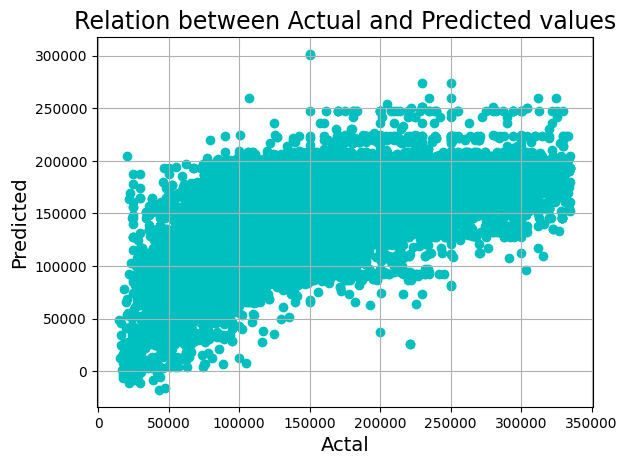

In [25]:
# plotting actual and predicted
plt.scatter(x=y_test,y=y_pred,color='c')
plt.title('Relation between Actual and Predicted values',fontsize=17)
plt.xlabel('Actal',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.grid()
plt.show()

The plot between `y_test` and `y_pred` shows that the relation is non-linear.<br>
Thus classic linear regression won't perform well.

### NOTE
I tried various models like `Decision Tree`, `RandomForest`, `XGBoost`, and `LightGBM` <br>
and various processing techniques like <br>
**Log transformation**<br>
**Yeo-Johnson**<br>
**Hyperparameter-tuning**<br>
**Ensembling** <br> 
**Feature engineering** <br>
However, nothing worked, then I went to kaggel and asked for advice there, one of the advice was to apply <br>
clustering and divide target into segments and then running different models on each cluster. <br>

So below is the same approach

## KMean Clustering Model
<img src="https://writing.ku.edu/sites/writing/files/images/Writing_Guide_Rev_2022/Clustering.jpg" alt="kmm" width="500">


In [29]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
#from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.decomposition import PCA

# X and  y
X= df.drop(cols_to_test_only,axis=1)
y= df['salary']

# making an instance of KMeans clustering algorithm
kmeans=KMeans(n_clusters=3,random_state=42) 
# fit's kmean model and predicts simultaneously , assign's clustsers to each data points
salary_cluster= kmeans.fit_predict(y.values.reshape(-1,1))
# add the cluster labels as a new column in dataset X
X['cluster']= salary_cluster

In [27]:
# Creating two variabels for storing number and object type columns num and cat respectively.
num= X.select_dtypes(include=['number']).drop(columns=['cluster']).columns.tolist()
cat= X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# tarin_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
# creating a dict name models for storing models performance on each cluster
models={}

# loop
for cluster in range (3):  # range is set to 3 as we have 3 clusters [o,1,2]
    # find the row in X_train['cluster'] that belongs to current cluster 
    idx= X_train['cluster']==cluster
    # get the feature data from current cluster , excluding the column 'cluster' 
    X_cluster = X_train[idx].drop(columns=['cluster'])
    # get the labels
    y_cluster = y_train[idx]

    # apply column transformer  standardize and  encode the values
    preprocessing= make_column_transformer((StandardScaler(),num),
                                            (OneHotEncoder(handle_unknown='ignore'),cat),remainder='drop')

    # make a pipeline
    pipeline=make_pipeline(preprocessing, LGBMRegressor())
    # fit the data into pipeline
    pipeline.fit(X_cluster,y_cluster)
    # stores the trained pipeline in the dictionary, using the cluster number as the key.
    models[cluster]= pipeline

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 46052, number of used features: 124
[LightGBM] [Info] Start training from score 162468.283636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 42113, number of used features: 197
[LightGBM] [Info] Start training from score 90670.160639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

In [31]:
# assigna cluster label to each value of y_test using the previously trained KMeans model
X_test_cluster= kmeans.predict(y_test.values.reshape(-1,1))
# Remove the cluster from test features
X_test_input= X_test.drop(columns=['cluster'])

In [32]:
# Stores predictions
preds=[]

# looping through each row and predicting on each row
for i , row in X_test_input.iterrows(): 
    # gets the cluster label assigned to the current test sample
    cluster= X_test_cluster[X_test_input.index.get_loc(i)]
    # select the right model based on the sample’s cluster
    model= models[cluster]
    # create a ddataframe_columns
    row_df=pd.DataFrame([row.values],columns=row.index)
    # uses the selected model to make a prediction on that single test sample
    pred= model.predict(row_df)[0]
    # append the values in pred
    preds.append(pred)

In [33]:
# rounds the pred and store it in y_pred
y_pred=np.round(preds)
# evalutaion matrics
r2= r2_score(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
print(f'R2: {r2}')
print(f'RMSE: {np.sqrt(mse)}')

R2: 0.8659711562899426
RMSE: 23011.054790212478


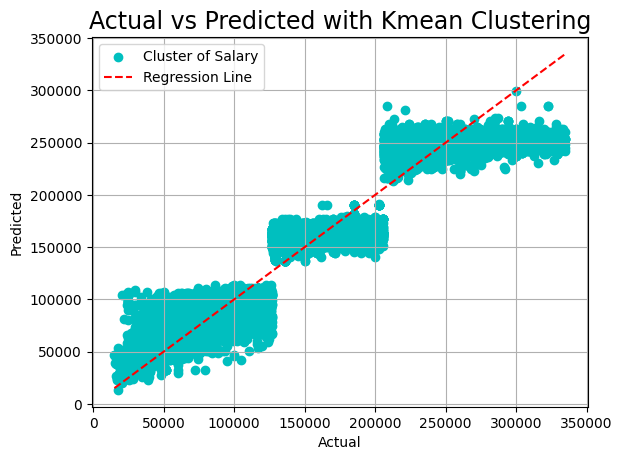

In [35]:
# plotting the graphs
plt.scatter(y_test,y_pred,color='c',label='Cluster of Salary')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',label='Regression Line')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with Kmean Clustering",fontsize=17)
plt.grid()
plt.legend()
plt.show()

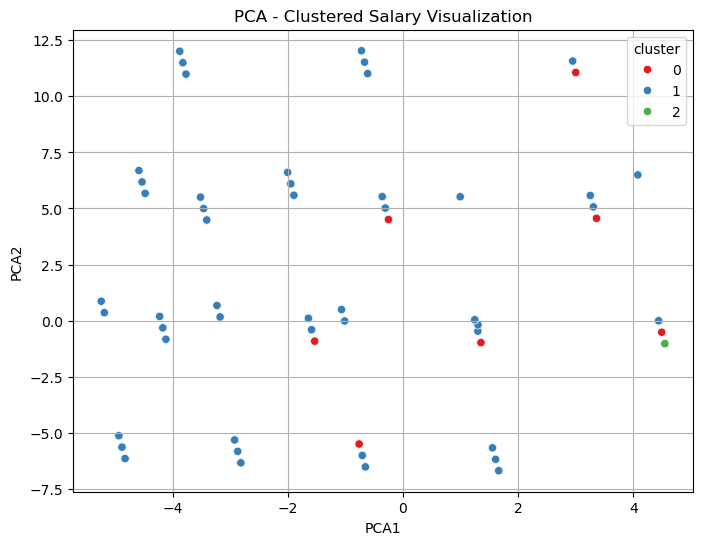

In [ ]:
# scale numerical features (excluding non-numeric columns)
X_scaled = StandardScaler().fit_transform(X.drop(columns=['cluster', 'job_title', 'salary_currency', 'employee_residence', 'company_location']))

# apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# create a DataFrame from PCA results and add cluster labels
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df['cluster'] = X['cluster'].values

# plot the clusters in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title("PCA - Clustered Salary Visualization")
plt.grid()
plt.savefig('images/MODEL/pca.png')
plt.show()
